In [2]:
%matplotlib notebook
import numpy as np
import scipy.signal
import matplotlib.pylab as plt
from matplotlib import animation, patches, rc
import ipywidgets as widgets
import matplotlib as mpl
rc('animation', html='html5')
rc('savefig', dpi=80)
rc('figure', dpi=80)
from IPython.display import YouTubeVideo, HTML, Audio

# Espectro y Transformada de Fourier

## Espectro


- Isaac Newton llamó **espectros** a los componentes que forman la luz blanca y que normalmente no se pueden ver
- Newton mostró usando prismas que la luz blanca pueden descomponerse en colores y viceverza
- Hoy entendemos que la luz como onda tiene una **frecuencia asociada** y que cada color es una frecuencia particular


<table>
    <tr><td>
        <img src="../images/fourier-newton.jpg" width="400" align="center">  
        </td><td>
        <img src="../images/fourier-prism.jpg" width="400" align="center">  
</td></tr></table>


Paradojicamente, Newton nunca acepto que esto se debía a la frecuencia de la radiación ya que creía en la teoría corpuscular de la luz


## Onda

- Es una perturbación que transporta energía a través del espacio
- Es una oscilación o vibración de un medio físico o campo
- Se describe (tipicamente) por su frecuencia (período), amplitud y desfase

**Onda electromagnética** 

- Oscilaciones en el campo eléctrico y magnético
- Transporta energía electromágnetica radiativa
- Dependiendo de su frecuencia se clasifican como:

<img src="../images/fourier-colors.jpg" align="center" width="500">

## Componentes frecuenciales y armónicos

Una sinusoide es una función del tiempo completamente descrita por su amplitud $A$, frecuencia $f$ y fase $\phi$

$$
s(t) = A \cos (2 \pi f t + \phi)
$$




- El recíproco de la frecuencia es el período $P= \frac{1}{f}$
- Una señal que es períodica en $\frac{P}{k} ~ \forall k \in \mathbb{N}$ también lo es en $P$
- Llamamos a $f_0 = 1/P$ la **frecuencia fundamental**
- Llamamos a $f_k = kf_0 = k/P ~~ \forall k \in \mathbb{N}$ el **k-esimo armónico de $f_0$**


<IPython.core.display.Javascript object>


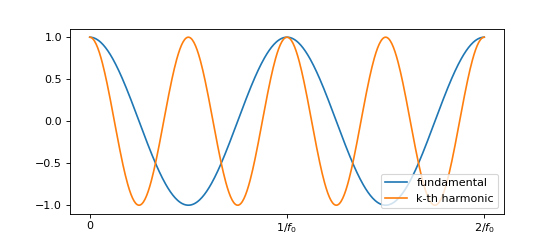

interactive(children=(SelectionSlider(description='k', options=(2, 3, 4, 5, 6), value=2), Output()), _dom_clas…

In [3]:
fig, ax = plt.subplots(figsize=(7, 3))
f = 1.51518
t = np.linspace(0, 2/f, num=500); x = np.cos(2.0*np.pi*f*t)
ax.plot(t, x, label='fundamental')
line = ax.plot(t, x, label='k-th harmonic'); ax.legend(loc=4)
ax.set_xticks([0, 1/f, 2/f]); ax.set_xticklabels(["0", r"$1/f_0$", r"$2/f_0$"]);

def update(k):
    line[0].set_ydata(np.cos(2.0*np.pi*t*f*k))
    plt.show()
    
widgets.interact(update, k=widgets.SelectionSlider(options=[2, 3, 4, 5, 6]));

- Si sumamos dos sinusoides con amplitudes arbitrarias pero con igual frecuencia fundamental $f_0$ [Hz], la suma también es periódica con fundamental $f_0$ [Hz]
- La suma puede ser una señal periódica arbitraria (no trigonométrica)

<IPython.core.display.Javascript object>


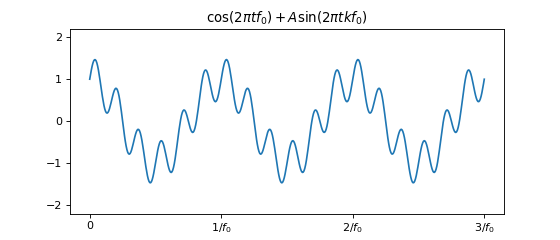

interactive(children=(SelectionSlider(description='k', options=(1, 2, 3, 4, 5, 6), value=1), FloatSlider(value…

In [4]:
plt.close('all'); fig, ax = plt.subplots(figsize=(7, 3))
f = 1.51518
t = np.linspace(0, 3/f, num=500); x = np.cos(2.0*np.pi*f*t)
line = ax.plot(t, 2*x)
ax.set_xticks([0, 1/f, 2/f, 3/f]); ax.set_xticklabels(["0", r"$1/f_0$", r"$2/f_0$", r"$3/f_0$"]);
ax.set_title(r"$\cos(2\pi t f_0) + A \sin(2\pi t k f_0)$")
update = lambda k, A: line[0].set_ydata(x + A*np.sin(2.0*np.pi*t*f*k))
widgets.interact(update, k=widgets.SelectionSlider(options=[1, 2, 3, 4, 5, 6]), 
         A=widgets.FloatSlider(min=0.5, max=1.0, value=0.5));

- Dependiendo de los armónicos que incorporemos podemos reproducir distintas señales periódicas

<IPython.core.display.Javascript object>


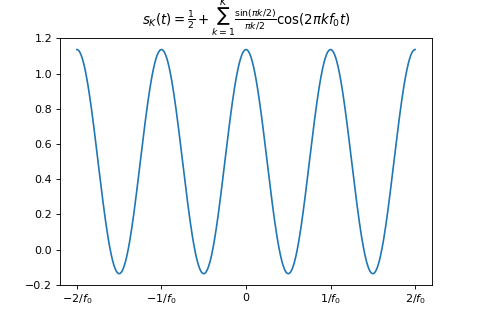

interactive(children=(SelectionSlider(description='K', options=(1, 2, 3, 4, 5, 6, 10, 20, 30, 50, 100), value=…

In [6]:
plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4))
f = 1.51518; t = np.linspace(-2/f, 2/f, num=5000); 
line = ax.plot(t, np.zeros_like(t))
ax.set_xticks([-2/f, -1/f, 0, 1/f, 2/f]); 
ax.set_xticklabels([r"$-2/f_0$", r"$-1/f_0$", "0", r"$1/f_0$", r"$2/f_0$"]);
ax.set_title(r"$s_K(t) =  \frac{1}{2} + \sum_{k=1}^K \frac{\sin(\pi k/2)}{\pi k/2} \cos(2\pi k f_0 t ) $")
def update(K):
    y = np.zeros_like(t) + 0.5
    for k in range(1, K+1):
        y += 2*np.sin(np.pi*k/2)*np.cos(2.0*np.pi*k*f*t)/(np.pi*k)
    line[0].set_ydata(y); ax.set_ylim([-0.2, 1.2])
widgets.interact(update, K=widgets.SelectionSlider(options=[1, 2, 3, 4, 5, 6, 10, 20, 30, 50, 100]));

<IPython.core.display.Javascript object>


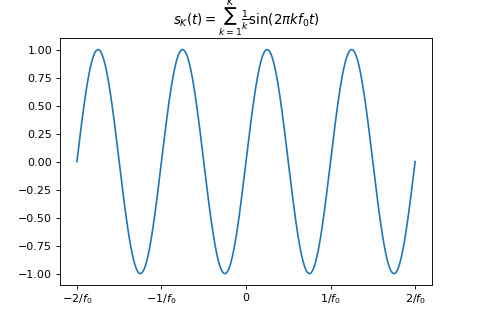

interactive(children=(SelectionSlider(description='K', options=(1, 2, 3, 4, 5, 10, 20, 30, 50, 100), value=1),…

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
f = 1.51518; t = np.linspace(-2/f, 2/f, num=5000); 
line = ax.plot(t, np.zeros_like(t))
ax.set_xticks([-2/f, -1/f, 0, 1/f, 2/f]); 
ax.set_xticklabels([r"$-2/f_0$", r"$-1/f_0$", "0", r"$1/f_0$", r"$2/f_0$"]);
ax.set_title(r"$s_K(t) = \sum_{k=1}^K \frac{1}{k} \sin(2\pi k f_0 t) $")
def update(K):
    y = np.zeros_like(t)
    for k in range(1, K+1):
        y += np.sin(2.0*np.pi*k*f*t)/k
    line[0].set_ydata(y); ax.set_ylim([np.amin(y)*1.1, np.amax(y)*1.1])
widgets.interact(update, K=widgets.SelectionSlider(options=[1, 2, 3, 4, 5, 10, 20, 30, 50, 100]));

- Las funciones coseno y seno son par e impar, respectivamente
- ¿Cómo podemos construir una señal periódica que no es par ni impar?
- Consideremos la siguiente forma general
$$
\begin{align}
s(t) &= \sum_{k=0}^\infty A_k \cos(2\pi k f t + \phi_k) \nonumber \\
&= \sum_{k=0}^\infty a_k \cos(2\pi k f t) + b_k \sin(2\pi k f t), \nonumber
\end{align}
$$
donde $a_k = A_k \cos(\phi_k)$ y $b_k = -A_k \sin(\phi_k)$ se obtienen de $\cos(x+y) = \cos(x)\cos(y) - \sin(x)\sin(y)$
- De esta forma $s(t)$ puede ser cualquier función real periódica con período $P=1/f$
- Esto se conoce como **serie trigonométrica** 

<IPython.core.display.Javascript object>


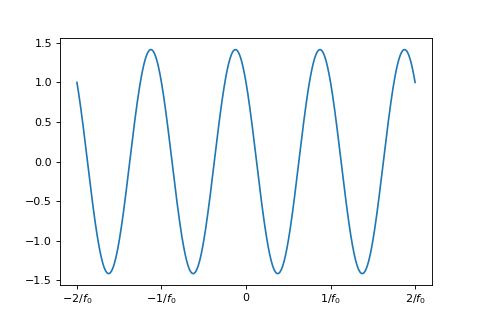

interactive(children=(SelectionSlider(description='K', options=(1, 2, 3, 4, 5, 10, 20, 30, 50, 100), value=1),…

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
f = 1.51518; t = np.linspace(-2/f, 2/f, num=5000); 
line = ax.plot(t, np.zeros_like(t))
ax.set_xticks([-2/f, -1/f, 0, 1/f, 2/f]); 
ax.set_xticklabels([r"$-2/f_0$", r"$-1/f_0$", "0", r"$1/f_0$", r"$2/f_0$"]);
def update(K):
    y = np.zeros_like(t)
    for k in range(1, K+1):
        y += np.cos(2.0*np.pi*k*f*t)/k + (-1)**k*np.sin(2.0*np.pi*(2*k-1)*f*t)/(2*k-1)
    line[0].set_ydata(y); ax.set_ylim([np.amin(y)*1.1, np.amax(y)*1.1])
widgets.interact(update, K=widgets.SelectionSlider(options=[1, 2, 3, 4, 5, 10, 20, 30, 50, 100]));

### Apéndice: Números complejos

Sea z un número complejo, lo podemos escribir en forma cartesiana 
$$
z = \Re[z] + j \Im[z] = a + j b
$$
donde $a \in \mathbb{R}$, $b \in \mathbb{R}$ y $j = \sqrt{-1}$ es el número imaginario.


También podemos escribirlo en forma polar
$$
z = c e^{j\phi} = c \cos(\phi) + j c \sin(\phi)
$$
donde 
- $c = |z| = \sqrt{a^2 + b^2} \in [0, \infty]$ es la magnitud 
- $\phi = \angle z = \tan^{-1} \left (\frac{b}{a} \right) \in [-\frac{\pi}{2}, \frac{\pi}{2}]$ es el ángulo
- $a = c \cos(\phi)$
- $b = c\sin(\phi)$

se pueden escribir las siguientes relaciones 

$$
\cos(\phi) = \frac{1}{2} (e^{j\phi} + e^{-j\phi}) ~\wedge~ \sin(\phi) = \frac{1}{2j} (e^{j\phi} - e^{-j\phi})
$$

el complejo conjugado de $z = a + j b = c e^{j\phi}$ es
$$
z^* = a - jb = c e^{-j\phi}
$$

***
<a id="section1"></a>
[Volver al índice](#index)

# Serie de Fourier
***

- En 1807 *Jean Baptiste Joseph Fourier* presenta un teorema indicando que una función periódica arbitraria con periódo $P=1/f_0$ puede representarse como una suma ponderada de senos y cosenos
- La serie de Fourier (FS) para una función compleja se define como
$$
s(t) = \sum_{k=-\infty}^{\infty} c_k e^{j 2\pi k f_0 t}, ~~ c_k \in \mathbb{C}
$$

***

**Notemos que: ** La serie trigonométrica es el caso particular de la FS para una función real
$$
\begin{align}
s(t) &= \sum_{k=-\infty}^{\infty} c_k e^{j 2\pi kf_0 t} \nonumber \\
&= \sum_{k=1}^{\infty} c_{-k} e^{-j 2\pi kf_0 t} + c_0 + \sum_{k=1}^{\infty} c_{k} e^{j 2\pi kf_0 t} \nonumber\\
&= \sum_{k=1}^{\infty} \left(c_{k} e^{j 2\pi kf_0 t}\right)^* + c_0 + \sum_{k=1}^{\infty} c_{k} e^{j 2\pi kf_0 t} \nonumber\\
&= c_0 + 2 \sum_{k=1}^{\infty} \Re [ c_{k} e^{j 2\pi kf_0 t} ]\nonumber\\
&= \sum_{k=0}^{\infty} A_k \cos({j 2\pi kf_0 t + \phi_k} ), \nonumber
\end{align}
$$
donde en la última equivalencia reconocemos
$$
c_k = \begin{cases}  \frac{1}{2} A_k e^{j\phi_k} & k> 0 \\ A_0 & k = 0 \\ c_{|k|}* & k < 0\end{cases}
$$

***

### Apéndice: Bases generadoras
 - Una base es un conjunto de un espacio vectorial
 - Los elementos de la base son linealmente independientes
 - Todos los elementos del espacio pueden expresarse como una combinación lineal de la base
 
Considere el espacio vectorial $\mathbb{R}^3$. El siguiente conjunto 

$$
\left \{ v_1=\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, v_2= \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}, v_3=\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}\right \},
$$

es una base generadora de $\mathbb{R}^3$, es decir un vector cualquiera $\vec a = (a_1, a_2, a_3) \in \mathbb{R}^3$ se puede representar como 

$$
\vec a = a_1 v_1 + a_2 v_2 + a_3 v_3.
$$

Un conjunto ortonormal siempre es linealmente independiente
***

***

## Base de Fourier

El conjunto de funciones 

$$
v_k (t) = \frac{1}{\sqrt{P}} e^{j2\pi k t / P} ~~ \forall k \in \mathbb{Z}
$$

cumple 

$$
\langle v_n (t), v_m (t) \rangle = \int_0^P v_n (t) v_m^* (t) dt = \frac{1}{P} \int_0^P e^{j2\pi (n-m)t/P} dt =\begin{cases}1 & n=m \\ 0 & n \neq m\end{cases}
$$

*i.e.* es un conjunto ortonormal (l.i.) en el espacio de funciones periódicas con periódo $P$

Esto es facilmente comprobable si estudiamos

$$
\int_0^P e^{j2\pi k t / P} dt = \int_0^P \cos(2\pi k t/P) dt + j \int_0^P \sin(2\pi k t/P) dt 
$$

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(6, 3))
dt=1e-4; P=1.1234; t = np.arange(0, P, step=dt);
line = ax.plot(t, np.zeros_like(t)); ax.set_ylim([-1.2, 1.2])
harmonic = lambda k: np.cos(2.0*np.pi*k*t/P)
def update(k):
    ax.cla(); ax.set_ylim([-1.2, 1.2])
    ax.plot(t, harmonic(k), 'k--')
    ax.fill_between(t, 0, harmonic(k), harmonic(k)>0, color='b', alpha=0.5)
    ax.fill_between(t, 0, harmonic(k), harmonic(k)<0, color='r', alpha=0.5)
    ax.set_title("$\int s dt$ = %e" %(np.sum(harmonic(k)*dt)))
interact(update, k=IntSlider_nice(min=0, max=10, value=1));

propiedad generadora?

***
### Síntesis

$$
s(t) = \sum_{k=-\infty}^{\infty} c_k e^{j 2\pi k t/P} 
$$

***

***
### Análisis

\begin{align}
\langle s(t),  e^{j 2\pi m t/ P} \rangle &= \int_0^P s(t) e^{-j 2\pi m t/ P} dt \nonumber \\
&= \int_0^P \sum_{k=-\infty}^{\infty} c_k e^{j 2\pi k t/P} e^{-j 2\pi m t/P} dt \nonumber \\
&= \sum_{k=-\infty}^{\infty} c_k  \int_0^P e^{j 2\pi (k-m) t/P}  dt \nonumber \\
&=  c_m  P \nonumber \\
\end{align}

Es decir los coeficientes de la FS se pueden encuentrar usando

$$
c_m = \frac{1}{P} \int_0^P s(t) e^{-j 2\pi m t/P} dt
$$
***

***

### Ejemplo: FS de señal cuadrada

Sea 
$$
s(t) = \begin{cases} 1 & t \in[0, \frac{P}{2}] \\ 0 & t \in [\frac{P}{2}, P] \end{cases}
$$
Los coeficientes de su FS son

$$
c_0 = \frac{1}{P} \int_0^P s(t) dt = \frac{1}{P} \int_0^{P/2} dt = \frac{1}{2}
$$
y
$$
\begin{align}
c_k &= \frac{1}{P} \int_0^\frac{P}{2} e^{-j2\pi kt/P} dt  \nonumber  \\  
&= -\frac{j}{P}  \int_0^\frac{P}{2} \sin(2\pi kt/P) dt \nonumber \\
&=  0 + j \frac{\cos(\pi k)  - 1}{2\pi k} \nonumber 
\end{align}
$$
Notemos que los coeficientes 
- A excepsión de $c_0$ sólo tienen parte imaginaria
- sólo son distintos de cero para armónicos impares
- $c_k$ es una función impar

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4))
k = np.arange(-10, 10, step=1).astype('float')
ax.stem(k, (np.cos(np.pi*k)-1)/(2*np.pi*k+1e-10), basefmt=" ")
ax.set_xticks(range(-10, 10, 2)); ax.set_xlabel("k"); ax.set_ylabel("$\Im[c_k]$");

Finalmente la FS está dada por
$$
\begin{align}
s(t) &= \sum_{k=-\infty}^{\infty} j \frac{\cos(\pi k)  - 1}{2\pi k}  e^{j 2\pi k t/P} \nonumber \\
&= \frac{1}{2} + \sum_{k=1}^{\infty}  \frac{1 - \cos(\pi k)}{\pi k} \sin(2\pi k t/P)  \nonumber 
\end{align}
$$

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4))
f_0 = 1.51518; t = np.linspace(-2/f_0, 2/f_0, num=5000); 
line = ax.plot(t, np.zeros_like(t))
ax.set_xticks([-2/f_0, -1/f_0, 0, 1/f_0, 2/f_0]); 
ax.set_xticklabels([r"$-2/f_0$", r"$-1/f_0$", "0", r"$1/f_0$", r"$2/f_0$"]);
def update(K):
    y = np.zeros_like(t) + 0.5
    for k in range(1, K+1):
        y += (1-np.cos(np.pi*k))*np.sin(2.0*np.pi*t*k*f_0)/(np.pi*k)
    line[0].set_ydata(y); ax.set_ylim([-0.2, 1.2])
interact(update, K=SelectionSlider_nice(options=[1, 2, 3, 4, 5, 10, 20, 30, 50, 100]));

***

## Propiedades de la FS

- Si $s(t)$ es par entonces $c_k$ es par
- Si $s(t)$ es impar entonces $c_k$ es impar
- Si $s(t + P/2) = -s(t)$ (antiperiódica) entonces $c_k=0 $ para k par
- Si $s(t)$ es real y par entonces $c_k$ es real y par
- Si $s(t)$ es real e impar entonces $c_k$ es imaginario e impar
- La FS es lineal

***

### Teorema de Parseval

La potencia de una señal puede calcularse a partir de sus componentes

\begin{align}
P_s &= \frac{1}{P} \int_0^P |s(t)|^2 dt \nonumber \\
&= \frac{1}{P} \int_0^P |\sum_{k=-\infty}^{\infty} c_k e^{j 2\pi k t/P }|^2 dt \nonumber \\
&= \frac{1}{P} \int_0^P \sum_{k=-\infty}^{\infty} |c_k |^2 dt \nonumber \\
&= \sum_{k=-\infty}^\infty |c_k|^2 \nonumber
\end{align}
***

Visualización interactiva de la FS: https://bl.ocks.org/jinroh/7524988

***

## Convergencia de la serie de Fourier (Oppenheim, SS, Chap 3.4)

Para una serie periódica con periódo $P$, si
1. Es absolutamente integrable: $\int_0^P |s(t)| dt < \infty$
1. Tiene un número finito de extremos
1. Tiene un número finito de discontinuidades

entonces su FS converge para todo tiempo, excepto en las discontinuidades donde converge al punto medio.


- Estos tres puntos se conocen como **Condiciones de Dirichlet**
- **Fenomeno de Gibbs:** Una discontinuidad requiere ancho de banda infinito, *i.e.* no puede reproducirse con un número finito de términos (vea el ejemplo de la señal cuadrada)

***

***
<a id="section2"></a>
[Volver al índice](#index)

# Transformada de Fourier
***
- El concepto de frecuencia puede aplicarse también a señales no-periódicas
- **Joseph Fourier:** Una señal no-periódica puede ser vista como una señal periódica **con un período infinito**
- El único requisito es que ahora las frecuencias son un continuo, con un espaciado infinitesimal


Veremos que:
- Una señal analógica puede ser vista como continua en el tiempo o continua en frecuencia
- Más adelante estudiaremos la Transformada de Fourier discreta (DFT) para señales digitales


***

Sea un tren de pulsos cuadrado con periódo P y ancho $2T < P$ definido en un período como

$$
s(t) = \begin{cases} 1, & |t| < T \\ 0, & T<|t| < P/2 \end{cases}
$$

<IPython.core.display.Javascript object>


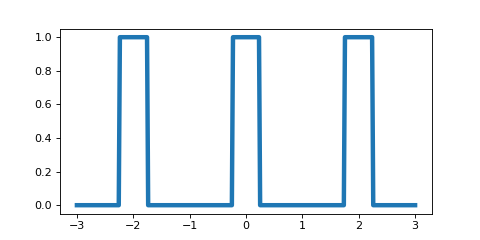

In [12]:
fig, ax = plt.subplots(figsize=(6, 3))

def create_square_pulse_train(t, T=0.25, P=2):
    s = np.zeros_like(t)
    for k in np.unique(t//P):
        s[(t> k*P - T) & (t< k*P + T)] = 1
    return s

t = np.linspace(-3, 3, num=300)
ax.plot(t, create_square_pulse_train(t), linewidth=4);

Su serie de Fourier es 
$$
c_0 = \frac{1}{P} \int_{-P/2}^{P/2} s(t) dt = \frac{1}{P} \int_{-T}^{T}  dt = \frac{2T}{P}
$$
y
$$
\begin{align}
c_k &= \frac{1}{P} \int_{-T}^{T} e^{-j2\pi kt/P} dt  \nonumber \\
&= \frac{1}{\pi k} \sin \left (2\pi k \frac{T}{P} \right)  \nonumber 
\end{align}
$$
¿Qué ocurre a medida que P crece?


<IPython.core.display.Javascript object>


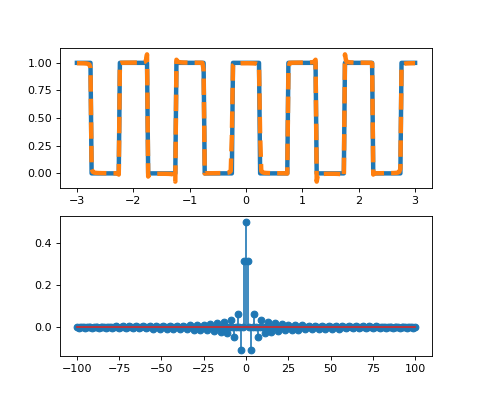

interactive(children=(IntSlider(value=1, description='P', max=15, min=1), Checkbox(value=False, description='s…

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(6, 5))

def update(P, show_envelope=False):
    ax[0].cla(); ax[1].cla(); T=0.25
    s = create_square_pulse_train(t, T=T, P=P)
    xhat = np.zeros_like(t) + 2*T/P
    ck = np.zeros(shape=(201, )); ck[100] = 2*T/P
    ck[101:] = np.array([np.sin(2.0*np.pi*k*T/P)/(np.pi*k) for k in range(1, 101)])
    ck[:100] = ck[101:][::-1]
    for k in range(1, 100):
        xhat += 2*np.cos(2.*np.pi*t*k/P)*ck[100+k]
    ax[0].plot(t, s, linewidth=4); ax[0].plot(t, xhat, linestyle='--', linewidth=4);
    f_axis = np.linspace(-100/P, 100/P, num=len(ck))
    ax[1].stem(f_axis, P*ck); 
    if show_envelope:
        ax[1].plot(f_axis, 2*T*np.sinc(2*f_axis*T), 'k-', linewidth=4, alpha=0.75);
widgets.interact(update, P=widgets.IntSlider(min=1, max=15));

¿Qué ocurre con este ejemplo?

- A mayor P disminuye la frecuencia fundamental
- Cuando P es muy grande el tren de pulsos tiende a un único pulso
- A mayor P los coeficientes de la FS muestrean con más fineza **la envolvente**
- ¿A qué corresponde la envolvente en este caso?

***

***

Del ejemplo anterior notamos que la envolvente de la FS:
- Es una función de la frecuencia $f=kf_0 = k/P$
- Se obtiene cuando $P\to \infty$ y se define como
$$
S(f) = P c_k = \int_{-\infty}^{\infty} s(t) e^{-j 2\pi t  f} dt,
$$
o también
$$
S(\omega) = \int_{-\infty}^{\infty} s(t) e^{-j\omega t } dt,
$$
donde $\omega = 2\pi f$ se llama frecuencia angular.
- Se conoce como **transformada de Fourier directa** o **integral de Fourier**.

***

Reemplazando el resultado anterior en la ecuación de síntesis tenemos que
$$
\begin{align}
s(t) &= \lim_{f_0 \to 0} \sum_{k=-\infty}^{\infty} f_0 S(k f_0) e^{j 2\pi t  k f_0} \nonumber  \\
&= \int_{-\infty}^{\infty} S(f) e^{j 2\pi t  f} df \nonumber \\
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} S(\omega) e^{j \omega t } d\omega, \nonumber 
\end{align}
$$
que se conoce como **transformada de Fourier inversa**.

***

***

## Par de Fourier

***

Directa:
$$
S(\omega) = \mathbb{FT}[s(t)] =  \int_{-\infty}^{\infty} s(t) e^{-j\omega t } dt,
$$

***

Inversa:
$$
s(t) =  \mathbb{FT}^{-1}[S(\omega)] = \frac{1}{2\pi} \int_{-\infty}^{\infty} S(\omega) e^{j \omega t } d\omega,
$$

***

***

### Ejemplo: Transformada de Fourier de pulso cuadrado

Sea
$$
s(t) = \begin{cases} 1, & |t| < T \\ 0, & |t| > T\end{cases}
$$

su transformada de Fourier es
$$
\begin{align}
S(\omega) &= \int_{-\infty}^{\infty} s(t) e^{-j\omega t } dt \nonumber \\
&= \int_{-T}^{T} e^{-j\omega t } dt \nonumber \\
&= \frac{1}{-j\omega} \left(e^{-j\omega T }  - e^{j\omega T } \right) \nonumber \\
&= \frac{2}{\omega}  \sin(\omega T) = 2T \text{sinc}(\omega T) \nonumber 
\end{align}
$$

<IPython.core.display.Javascript object>


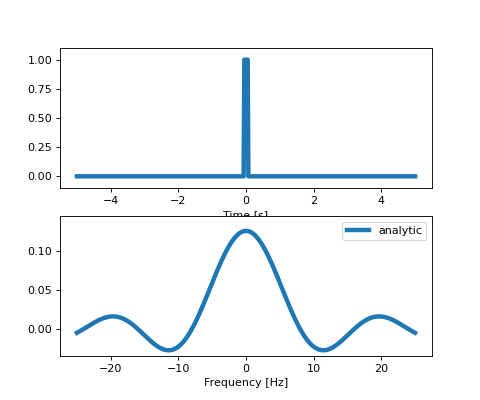

interactive(children=(SelectionSlider(description='T', options=(0.0625, 0.125, 0.25, 0.5, 1, 2), value=0.0625)…

In [15]:
plt.close('all'); fig, ax = plt.subplots(2, figsize=(6, 5))
t = np.linspace(-5, 5, num=500); 
f = np.linspace(-25, 25, num=500)
Fdict = np.cos(2.0*np.pi*t[:, np.newaxis]*f[:, np.newaxis].T)
ax[0].set_xlabel('Time [s]'); ax[1].set_xlabel('Frequency [Hz]');
line_square = ax[0].plot(t, np.zeros_like(t), linewidth=4); ax[0].set_ylim([-.1, 1.1])
line_sinc = ax[1].plot(f, np.zeros_like(f), linewidth=4, label='analytic')
#line_FT = ax[1].plot(f, np.zeros_like(f), linewidth=4, linestyle='--', label='numeric')
ax[1].legend(loc=1)

def update(T):    
    s = np.zeros_like(t); s[(t> - T) & (t<  T)] = 1
    S =  np.sum(s*Fdict, axis=1)*0.02
    line_square[0].set_ydata(s); 
    line_sinc[0].set_ydata(2*T*np.sinc(2*f*T)); 
    #line_FT[0].set_ydata(S); 
    ax[1].set_ylim([np.amin(S)*1.2, np.amax(S)*1.2])

widgets.interact(update, T=widgets.SelectionSlider(options=[1/16, 1/8, 1/4, 1/2, 1, 2]));

***

## Propiedades de la transformada de Fourier

Sea $S(\omega) = \mathbb{FT} [s(t)]$

- La FT es lineal
$$
\mathbb{FT}[c_1 s_1(t) + c_2 s_2(t)] = c_1\mathbb{FT}[s_1(t)] + c_2\mathbb{FT}[s_2(t)] 
$$
- Traslación
$$
\mathbb{FT}[s(t \pm \tau)] = e^{\pm j\omega \tau}\mathbb{FT}[s(t)] 
$$

- Escalamiento
$$
\mathbb{FT}[s(\beta t)] = \frac{1}{|\beta|} S \left( \frac{\omega}{\beta} \right)
$$

- Propiedad de diferenciación
$$
\mathbb{FT}\left[\frac{ds(t)}{dt}\right] = j \omega S(\omega)
$$
***
- La convolución en el tiempo es multiplicación en frecuencia 
$$
\mathbb{FT}[(s_1 * s_2)(t)] =  \mathbb{FT}[s_1(t)] \cdot \mathbb{FT}[s_2(t)],
$$
donde 
$$
(s_1 * s_2)(t) = \int s_1(\tau) s_2(t-\tau) d\tau
$$
es la operación de convolución
- y viceversa
$$
\mathbb{FT}[s_1(t)\cdot s_2(t)] =  \frac{1}{2\pi}\mathbb{FT}[s_1(t)] * \mathbb{FT}[s_2(t)]  
$$
***
- Dualidad
$$
\mathbb{FT}[S(t)] = 2\pi s(-\omega)
$$
***
- Teorema de Parseval
$$
\int | s(t) |^2 dt = \frac{1}{2\pi} \int | S(\omega) |^2 d\omega
$$
***

***

### Anexo: Operación de convolución

Convolución se define como:
$$
(s_1 * s_2)(t) = \int s_1(\tau) s_2(t-\tau) d\tau
$$

In [ ]:
plt.close('all'); fig, ax = plt.subplots(2, figsize=(7, 4))
t = np.arange(-4, 4, step=1e-2)

def square_pulse(t, a=0, T=1):
    s = np.zeros(shape=t.shape)
    s[np.absolute(t-a)<T] = 0.5 + 0.5*(t[np.absolute(t-a)<T]-a)/T 
    return s
lap_pulse = lambda t, a=0, s=1 : np.exp(-np.absolute(t-a)/s)
conv_s = np.convolve(square_pulse(t), lap_pulse(t), mode='same')

def update(a = 0): 
    ax[0].cla(); ax[1].cla()
    p1, p2 = square_pulse(t, 0.1*a - 4), lap_pulse(t)
    ax[0].plot(t, p2); ax[0].plot(t, p1); 
    ax[0].fill_between(t, 0, p1*p2, alpha=0.5)
    ax[1].plot(t, conv_s[::-1]); ax[1].scatter(0.1*a -4, np.sum(p1*p2), s=100, c='k')
    
anim = animation.FuncAnimation(fig, update, frames=80, interval=100, blit=True)

***

### Ejemplo: Transformada de Fourier de una delta de Dirac

La delta de dirac se define como 

$$
\delta(t-t_0) = \begin{cases} +\infty, & t=t_0 \\ 0, & t\neq t_0 \end{cases}
$$

y su transformada de Fourier es
$$
\begin{align}
S(\omega) &= \int_{-\infty}^{\infty} \delta(t-t_0) e^{-j\omega t } dt \nonumber\\
&= e^{-j\omega t_0} \nonumber
\end{align}
$$

Notemos que

$$
\delta(t-t_0) = \mathbb{FT}^{-1} \left[e^{-j\omega t_0}\right] = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-j\omega (t-t_0)} d\omega
$$

***

### Ejemplo: Transformada de Fourier de una exponencial compleja

Sea

$$
s(t) = e^{j\omega_0 t}
$$

su transformada de Fourier es:
$$
\begin{align}
S(\omega) &= \int_{-\infty}^{\infty} e^{- j(\omega-\omega_0) t}  dt \nonumber \\
&= 2 \pi \delta(\omega - \omega_0)\nonumber
\end{align}
$$

***Nota:*** Usando la propiedad de dualidad se llega al mismo resultado
$$
\mathbb{FT}[S(t)=e^{-j t \omega_0}] = 2\pi\delta(\omega_0 - \omega) = 2\pi\delta(\omega - \omega_0)
$$

***

### Ejemplo: Transformada de Fourier de coseno

Sea

$$
s(t) = \cos(\omega_0 t) = \frac{1}{2} (e^{j\omega_0 t} + e^{-j\omega_0 t})
$$

su transformada de Fourier es:
$$
\begin{align}
S(\omega) &= \frac{1}{2} \int_{-\infty}^{\infty} e^{- j(\omega-\omega_0) t}  + e^{- j(\omega+\omega_0) t} dt \nonumber \\
&= \pi \left[ \delta(\omega - \omega_0) + \delta(\omega + \omega_0) \right]\nonumber
\end{align}
$$

In [ ]:
def plot_spectrum(axis, arrows, dirs, colors):
    axis.plot([-2, 2], [0, 0], linestyle='--', linewidth=2, c='k', alpha=0.5)
    axis.plot([0, 0], [-2, 2], linestyle='--', linewidth=2, c='k', alpha=0.5)
    axis.set_xlim([-2 , 2]); axis.set_ylim([-1.5 , 1.5]);
    for arrow, dire, color in zip(arrows, dirs, colors):
        axis.arrow(arrow, 0, 0, dire, head_width=0.1, 
                   head_length=0.2, linewidth=2, fc=color, ec=color)
        
fig, ax = plt.subplots(3, 2, figsize=(6, 6))
t = np.linspace(-2, 2, num=1000); 
y = np.cos(2.0*np.pi*t); ax[0, 0].plot(t, y, c='k');
y = np.sin(2.0*np.pi*t); ax[0, 0].plot(t, y, c='r');
plot_spectrum(ax[0, 1], [1], [1], ['k'])
y = np.cos(2.0*np.pi*t); ax[1, 0].plot(t, y, c='k');
plot_spectrum(ax[1, 1], [-1, 1], [1, 1], ['k', 'k'])
y = np.sin(2.0*np.pi*t); ax[2, 0].plot(t, y, c='k');
plot_spectrum(ax[2, 1], [-1, 1], [1, -1], ['r', 'r'])

***

### Propiedades de la transformada de Fourier

Con la transformada de la delta de Dirac podemos escribir
$$
\begin{align}
\mathbb{FT}^{-1}[\mathbb{FT}[s(t)]] &= \frac{1}{2\pi} \int_{\omega=-\infty}^{\infty}  \int_{t'=-\infty}^{\infty} s(t') e^{-j\omega t' } dt' e^{j \omega t } d\omega \nonumber \\
&= \frac{1}{2\pi} \int_{t'=-\infty}^{\infty} s(t') \int_{\omega=-\infty}^{\infty}   e^{j \omega (t -t')} d\omega dt' \nonumber  \\
&= \int_{t'=-\infty}^{\infty} s(t') \delta(t-t') dt' \nonumber \nonumber  \\
& = s(t) \nonumber
\end{align}
$$

***
### Propiedad de convolución de la FT

$$
\begin{align}
\mathbb{FT}[(s_1 * s_2)(t)] &=  \int_t \int_\tau  s_1(\tau) s_2(t-\tau) e^{-j\omega t} d\tau dt \nonumber \\
&=   \int_\tau  s_1(\tau) e^{-j\omega \tau} d\tau \int_x s_2(x) e^{-j\omega x}  dx \nonumber \\
&=  \mathbb{FT}[s_1(t)] \cdot \mathbb{FT}[s_2(t)], \nonumber 
\end{align}
$$

***

### Propiedad de modulación de la FT

$$
\begin{align}
\mathbb{FT}[s_1(t) \cdot s_2(t)] &=    \int_t  s_1(t) s_2(t) e^{-j\omega t}  dt \nonumber \\
&=  \frac{1}{2\pi} \int_{\widehat \omega} S_1(\widehat \omega)  \int_t  s_2(t) e^{-j(\omega - \widehat \omega )t}  dt d\widehat \omega  \nonumber \\
&=  \frac{1}{2\pi} \int_{\widehat \omega} S_1(\widehat \omega) S_2(\omega-\widehat \omega) d\widehat \omega  \nonumber \\
&=  \frac{1}{2\pi} \mathbb{FT}[s_1(t)] * \mathbb{FT}[s_2(t)]  , \nonumber 
\end{align}
$$

que también se puede probar por dualidad
***

## Caso práctico

Sean $f_M(t)$ una señal cualquiera y $f_C(t) = \cos(\omega_c t)$

Usando la propiedad de modulación tenemos

$$
\begin{align}
\mathbb{FT}[f_M(t) f_C(t)] &= \frac{1}{2\pi} \mathbb{FT}[f_M(t)] * \mathbb{FT}[\cos(\omega_c t)] \nonumber \\
&= \frac{1}{2} F_M(\omega) * \left[ \delta(\omega - \omega_c) + \delta(\omega + \omega_c) \right] \nonumber \\
&= \frac{1}{2} F_M(\omega - \omega_c) + \frac{1}{2} F_M(\omega + \omega_c) \nonumber
\end{align}
$$

El espectro de $f_M(t)$ se traslada en $\pm \omega_c$!

### Modulación de amplitud (AM)

Consideremos que:
- El audio (onda mecánica) en rango audible está en $[20, 20k]$ [Hz]
- Las ondas de radio (EM) están en el rango de los $\sim$[GHz] y se transmiten bien en la atmósfera terrestre

Luego:
- Llamamos a $f_M(t)$ señal modulada, es la que contiene la información, *e.g.* una señal de voz grabada
- Llamamos a $f_C(t)$ señal portadora, es la que "acarrea" la información, *e.g* una señal de radio a $1$ [MHz]
- En este caso  particular la información corresponde a la amplitud de la portadora

Es decir que:
- La información de audio puede viajar en la atmosfera terrestre!
- Se pueden tener múltiples canales enviando distintos $f_M(t)$


***

### Ejemplo: Transformada de Fourier de una exponencial decayente

Sea

$$
s(t) = \begin{cases} e^{-\gamma t} & t \geq 0 \\ 0 & t<0 \end{cases}
$$

Su transformada de Fourier es

$$
\begin{align}
S(\omega) &= \int_0^\infty e^{-\gamma t} e^{-j\omega t} dt \nonumber \\
&= \int_0^\infty e^{-t (\gamma +j\omega)} dt \nonumber \\
&= \frac{1}{\gamma + j \omega} = \frac{\gamma - j \omega}{\gamma^2 + \omega^2} \nonumber \\
& = \frac{1}{\sqrt{\gamma^2 + \omega^2}} e^{j \tan^{-1}(-\omega/\gamma)} = |S(\omega)| e^{j\Phi(\omega)} \nonumber 
\end{align}
$$

***

## Definición: Espectros de amplitud y fase

Sea la transformada de Fourier de una función general $s(t)$, podemos escribirla como

$$
S(\omega) = |S(\omega)| e^{j\Phi(\omega)},
$$

donde $|S(\omega)|$ se conoce como **espectro de amplitud** y $\Phi(\omega)$ como **espectro de fase**

Para el ejemplo anterior:

In [ ]:
fig, ax = plt.subplots(3, figsize=(6, 5))
t = np.linspace(-2, 5, num=200); s = np.zeros_like(t); 
line_s = ax[0].plot(t, s); ax[0].set_ylim([-.2, 1.2])
w = np.linspace(-5, 5, num=200); Sa = np.zeros_like(w); Sp = np.zeros_like(w)
line_sa = ax[1].plot(w, Sa); ax[1].set_title("Espectro de magnitud")
line_sp = ax[2].plot(w, Sp); ax[2].set_ylim([-np.pi/2, np.pi/2]); ax[2].set_title("Espectro de fase")
def update(gamma):
    s[t>0] = np.exp(-gamma*t[t>0])
    line_s[0].set_ydata(s); 
    line_sa[0].set_ydata(1/(gamma**2+w**2)); ax[1].set_ylim([-0.2, 1.1/gamma**2])
    line_sp[0].set_ydata(np.arctan(-w/gamma)); 

interact(update, gamma=SelectionSlider_nice(description=r"$\gamma$", options=[0.25, 0.5, 1, 2, 4], value=1));

***
[Volver al índice](#index)

<a id="section4"></a>

# Transformada de Fourier Discreta (DFT)

***

- Nos interesa trabajar con señales digitales que están muestreadas en el tiempo
- Asumimos que la señal fue observada en un ventana de tiempo de ancho $T = t_z - t_a$ [s]
- Digamos que existe un sistema muestreador con frecuencia de muestreo $F_s$ [Hz] tal que
$$
s(t) = \sum_{n=0}^{N-1} s[n] \delta(t - n/F_s),
$$
y que hemos tomado $N = T F_s$ muestras de $s(t)$
- Reemplazando en la transformada de Fourier
$$
\begin{align}
S(\omega) &= \int s(t) e^{-j\omega t} dt \nonumber \\
&= \int \sum_{n=0}^{N-1} s[n] \delta(t - n/F_s) e^{-j\omega t} dt \nonumber \\
&=  \sum_{n=0}^{N-1} s[n] \int \delta(t - n/F_s) e^{-j\omega t} dt \nonumber \\
&=  \sum_{n=0}^{N-1} s[n] e^{-j\omega n/F_s} \nonumber 
\end{align}
$$
- Definiendo entonces $\omega = 2 \pi f = 2 \pi k \Delta f$ donde $\Delta f = \frac{1}{T} = \frac{F_s}{N}$ y reemplazando 
$$
S[k] =  \sum_{n=0}^{N-1} s[n] e^{-j \frac{2 \pi}{N} k n},
$$
donde $k = [0, 1, \ldots N-1]$, ¿A qué frecuencias corresponden estos índices?


***

## Propiedades de la DFT

- La DFT comparte las propiedades de la FT
- Esto incluye la propiedad de convolución, pero usando la **convolución circular** para secuencias de largo $N$
$$
\begin{align}
S_1[k] S_2[k] &= (s_1 \otimes s_2)[n] \nonumber \\
&= \sum_{m=0}^N s_1[m] s_2[(n-m)_N] \nonumber
\end{align}
$$
donde 
$$
(n-m)_N = \begin{cases} n-m & m<n<N \\ N - (n-m) & 0\leq n<m \end{cases}
$$
Existe una equivalencia entre la convolución circular y lineal 
$$
(s_1 \otimes s_2)[n] = (s_{p1} * s_{p2})[n]
$$
donde
$$
s_{p1}[n] = \begin{cases} s_1[n] & 0 \leq n < N \\ 0 & N \leq n < 2N \end{cases}
$$
corresponde a la secuencia original estirada agregando ceros al final (*zero padding*)

- La DFT es periódica, con período $N$

$$
\begin{align}
S[k+N] &= \sum_{n=0}^{N-1} s[n] e^{-j \frac{2 \pi}{N} (k+N) n} \nonumber \\
&=   \sum_{n=0}^{N-1} s[n] e^{-j \frac{2 \pi}{N} k n} e^{-j 2 \pi n} \nonumber \\
&= \sum_{n=0}^{N-1} s[n] e^{-j \frac{2 \pi}{N} k n} \nonumber 
\end{align}
$$

***

## Frecuencia de Nyquist

- Es la frecuencia más alta con que puede representarse una señal muestreada a $F_s$
- Su valor es $\frac{F_s}{2}$

***
## Rango frecuencial de la DFT

Considerando la frecuencia de Nyquist y la periodicidad de la DFT la correspondencia entre índices y frecuencias es
$$
\begin{matrix}
k & f = k \frac{F_s}{N} [Hz] \\
\hline
0 & 0\\
1 & \frac{F_s}{N}\\
2 & \frac{2 F_s}{N}\\
\vdots & \vdots\\
N/2 -1 & \frac{F_s}{2} - \frac{F_s}{N} \\
N/2 & \frac{F_s}{2} = -\frac{F_s}{2}\\
N/2+1 &  \frac{F_s}{2} + \frac{F_s}{N} = - \frac{F_s}{2}  + \frac{F_s}{N} \\
\vdots & \vdots\\
N-2 & -\frac{2 F_s}{N} \\
N-1 & -\frac{F_s}{N}\\
\end{matrix}
$$

***

## DFT como producto matricial

Sea $\{s_n\}_{n=0,\ldots,N-1}$ y definiendo 

$$
W_N = e^{-j \frac{2\pi}{N}} = \cos \left(\frac{2\pi}{N}\right) - j \sin \left(\frac{2\pi}{N}\right)
$$

podemos expresar la transformada de Fourier discreta como

$$
S[k] =  \sum_{n=0}^{N-1} s[n] W_N^{kn}, \quad k = [0, 1, \ldots N-1],
$$

que también puede ser expresado matricialmente como

$$
\begin{align}
\begin{pmatrix} 
S[0] \\
S[1] \\
S[2] \\
\vdots \\
S[N-1] \\
\end{pmatrix} &=
\begin{pmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & W_N & W_N^2 & \cdots & W_N^{N-1} \\
1 & W_N^2 & W_N^4 & \cdots & W_N^{N-2} \\
\vdots & \dots & \dots & \ddots &  \vdots \\
1 & W_N^{N-1} & W_N^{N-2} & \cdots & W_N \\
\end{pmatrix} 
\begin{pmatrix} 
s[0] \\
s[1] \\
s[2] \\
\vdots \\
s[N-1] \\
\end{pmatrix} \nonumber  \\
S &= \Omega s,
\end{align}
$$


Notemos que:
- Por definición $W_N^{kn} = \left(e^{-j \frac{2\pi}{N}}\right)^{kn} = e^{-j \frac{2\pi}{N}kn}$
- Por periodicidad $W_N^{2(N-1)} = W_N^{2(N-1) - N}  = W_N^{N-2}$
- También se tiene simetría hermítica: $W_N^{k(-n)} = W_N^{-kn} = (W_N^{kn})^*$
- $\Omega$ es una matriz cuadrada y simétrica 
- Las norma de las columnas/filas es N
$$
\langle x_k, x_k^*\rangle = \sum_{n=0}^{N-1} W_N^{kn} W_N^{-kn} = \sum_{n=0}^{N-1} W_N^{0} = N
$$
- Las filas/columnas son ortogonales (asumiendo $k \neq p$)
$$
\langle x_k, x_p^*\rangle = \sum_{n=0}^{N-1} W_N^{(k-p)n} = \frac{1 - W_N^{(k-p)N}}{1 - W_N^{k-p}}
$$
ya que $W_N^{N(k-p)} = \cos(2\pi (k-p)) + j \sin(2 \pi (k-p)) = 1$

***
La DFT tiene complejidad cuadrática: $N^2$ multiplicaciones y $N$ sumas
***

### Ejemplo

Sea $S=\{S[0], S[1], S[2], S[3]\}^T$ podemos encontrar $s$ usando

$$
S= 
\begin{pmatrix} 
S[0] \\
S[1] \\
S[2] \\
S[3] 
\end{pmatrix} =
\begin{pmatrix}
1 & 1  & 1 & 1\\
1 & W_4  & W_4^2 & W_4^3 \\
1 & W_4^2  & W_4^4 & W_4^2 \\
1 & W_4^3  & W_4^2 & W_4 \\
\end{pmatrix} 
s = \begin{pmatrix}
1 & 1  & 1 & 1\\
1 & -j  & -1 & j \\
1 & -1  & 1 & -1 \\
1 & j  & -1 & -j \\
\end{pmatrix} 
s
$$

Luego sólo tenemos que encontrar el inverso de $\Omega$

In [ ]:
np.linalg?

In [ ]:
4*np.linalg.inv([[1, 1, 1, 1], 
                 [1, -1j, -1, 1j], 
                 [1, -1, 1, -1], 
                 [1, 1j, -1, -1j]])

$$
\Omega^{-1} = \frac{1}{4}
\begin{pmatrix}
1 & 1 & 1 &  1 \\
1 & j & -1 &  -j \\
1 & -1 & 1 &  -1 \\
1 & -j & -1  & j \\
\end{pmatrix} = \frac{1}{4} \Omega^*
$$

Notemos que
- El inverso de $\Omega$ es su complejo conjugado dividido N
- Se puede verificar que esto ocurre para todo N

***
En resumen podemos recuperar $s$ a partir de $S$ usando

$$
s = \frac{1}{N} \Omega^* S
$$

o 

$$
s[n] = \frac{1}{N} \sum_{k=0}^{N-1} S[k] W_N^{-kn}, \quad n = [0, 1, \ldots N-1]
$$

que corresponde a la DFT inversa y cuya únicas diferencias con la DFT son el factor $\frac{1}{N}$ y el signo del exponente

***

- Explotaremos estas estructuras cuando derivemos la transformada rápida de Fourier

- La DFT es periódica y su período es la frecuencia de Nyquist
- Veremos que esto se conecta con el fenómeno de aliasing

In [ ]:
from scipy.signal import square
plt.close('all'); fig, ax = plt.subplots(2, 2, figsize=(6, 4))
t, dt = np.linspace(0, 5, num=200, endpoint=False, retstep=True); 
f = np.linspace(-1/dt, 1/dt, num=2*len(t), endpoint=False) 
tf = 2.0*np.pi*t[:, np.newaxis]*f[:,np.newaxis].T

def update(f0):
    for i, s in enumerate([np.sin(2.0*np.pi*f0*t), square(2.0*np.pi*f0*t)]):
        ax[0, i].cla(); ax[0, i].plot(t, s, linewidth=2);        
        S = np.dot(s, np.exp(-1j*tf)); 
        ax[1, i].cla(); ax[1, i].plot(f, np.absolute(S));
        ax[1, i].set_xticks([-20, 20])
interact(update, f0=SelectionSlider_nice(options=[1, 2, 5, 10, 19.99, 30]));

***
[Volver al índice](#index)

<a id="section6"></a>

# Transformada Rápida de Fourier (FFT)

***

- La computación de la DFT tiene complejidad $\mathcal{O}(N^2)$
- Existe una aproximación numérica con complejidad $\mathcal{O}(N\log N)$: la Fast Fourier Transform (FFT). 

El algoritmo de Cooley-Tukey obtiene una FFT recursiva que explota las simetrías en la DFT

$$
\begin{align}
S[k] &=  \sum_{n=0}^{N-1} s[n] W_N^{kn} \nonumber \\
&= \sum_{n=0}^{N/2-1} s[2n] W_N^{k 2n} + \sum_{n=0}^{N/2-1} s[2n+1] W_N^{k(2n+1)} \nonumber \\
&= \sum_{n=0}^{N/2-1} s[2n] W_{N/2}^{kn} + W_N^{k} \sum_{n=0}^{N/2-1} s[2n+1] W_{N/2}^{kn} \nonumber \\
&= S_E[k] + W_N^{k} S_O[k] ~~ \forall k \in [0,N/2]  \nonumber 
\end{align} 
$$

Notar que se calculan dos "medias" DFT

## Transformada rápida de Fourier


Por periodicidad de la DFT tenemos que
$$
\begin{align}
S_E[k + N/2] &=  \sum_{n=0}^{N/2-1} s[2n] W_{N/2}^{(k+N/2)n} \nonumber \\
&=  \sum_{n=0}^{N/2-1} s[2n] W_{N/2}^{kn} \exp \left(-j2\pi n \right) = S_E[k], \nonumber
\end{align}
$$

e igualmente

$$
S_O[k + N/2] = S_O[k],
$$

juntando ambos tenemos que
$$
\begin{align}
S[k + N/2] &=  S_E[k + N/2] + W_{N}^{(k+N/2)} S_O[k + N/2] \nonumber  \\
&=  S_E[k] + W_{N}^{k} \exp \left(-j\pi\right) S_O[k] \nonumber \\
&=  S_E[k] - W_{N}^{k} S_O[k] \nonumber 
\end{align}
$$

es decir

$$
\begin{align}
S[k] &=  S_E[k] + W_{N}^{k} S_O[k] \nonumber \\
S[k + N/2] &=  S_E[k] - W_{N}^{k} S_O[k] \quad \forall k \in [0,N/2]  \nonumber 
\end{align}
$$

- La DFT de $k$ y $k+N/2$ difieren en un signo
- Se han explotado las simetrías de la DFT para reducir el costo computacional

<img src="img/fft-16samples.png">

Ref: http://www.themobilestudio.net/the-fourier-transform-part-14

Cantidad de multiplicaciones

| N | DFT | FFT | FFT/DFT [%] |
|---|---|---|---|
| 32 | 1024 | 160 | 15.6 |
| 128 | 16,384 | 896 | 5.46 |
| 1,024 | 1,048,576 | 10,240 | 0.97 |

## Transformada rápida de Fourier

- Python: numpy.fft y scipy.fftpack
- C: The Fastest Fourier Transform in the WEst (FFTW)
- Para FFTW existen python wrappers

In [ ]:
#from scipy.signal import square
plt.close('all'); fig, ax = plt.subplots(1, 2, figsize=(6, 3))
t, dt = np.linspace(0, 5, num=200, endpoint=False, retstep=True); 
s = np.sin(2.0*np.pi*t) + 0.25*np.cos(2.0*np.pi*4*t + np.pi/3)

ax[0].cla(); ax[0].plot(t, s, linewidth=2);        
f = fftpack.fftfreq(n=len(t), d=dt); 
S = fftpack.fft(s); 
ax[1].cla(); ax[1].plot(f, np.absolute(S));

In [ ]:
t, dt = np.linspace(-10.0, 10.0, num=1000, retstep=True); 
s = np.sin(2.0*np.pi*t) 
freq = np.arange(-0.5/dt, 0.5/dt, step=1.0/20);
tf = 2.0*np.pi*t[:, np.newaxis]*freq[:, np.newaxis].T
print("DFT numpy")
%timeit -n 5 -r 5 np.dot(s, np.exp(-1j*tf));
print("FFT fftpack")
%timeit -n 5 -r 5 fftpack.fftshift(fftpack.fft(s))

### Ejemplo: Espectro de una señal sinusoidal con ruido blanco



In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3));

def f(noise_level=0.0, frequency=2.0):
    t, dt = np.linspace(-10.0, 10.0, num=1000, retstep=True); 
    s = np.sin(2.0*np.pi*frequency*t) + noise_level*np.random.randn(len(t));
    ax[0].cla(); ax[1].cla(); ax[0].set_xlim([-5, 5]);
    ax[0].plot(t, s, linewidth=2); ax[0].set_xlabel("Time [s]");
    ax[1].set_xlabel("Frequency [Hz]");
    ax[1].plot(fftpack.fftfreq(n=len(t), d=dt), np.absolute(fftpack.fft(s)), linewidth=2); 

interact(f, noise_level=FloatSlider_nice(min=0.0, max=10.0, description="Noise_level", layout=slider_layout),
            frequency=FloatSlider_nice(min=0.0, max=5.0, value=2, description="Signal frequency", layout=slider_layout));

## Interpretación gráfica de la Transformada de Fourier

La transformada de Fourier discreta de $x[n]$ es
$$
S[k] = \sum_{n=0}^{N-1} x[n] e^{-j2\pi \frac{nk}{N}}
$$

donde $S[k]$ es un número complejo, es decir tiene parte real y parte imaginaria

Para cada valor de $k$ podemos dibujar la parte imaginaria $-x[n]\sin (2\pi nk/N)$ versus la parte real $x[n]\cos (2\pi nk/N)$ formando un diagrama polar

El vector que se forma corresponde a la transformada de Fourier en $k$, en particular 
- el largo del vector es el valor absoluto de $S[k]$
- el ángulo del vector es el desfase de $S[k]$

In [ ]:
import scipy.fftpack

t_plot, dt = np.linspace(0.0, 10.0, num=1000, retstep=True)
f0 = 2.12
x_plot = np.cos(2.0*np.pi*f0*t_plot) #+ 0.4*np.cos(2.0*np.pi*2*f0*t_plot +np.pi/4) #+ 0.1*np.random.randn(1000)

t, x = t_plot[::10], x_plot[::10]
freq = fftpack.fftfreq(n=len(x), d=t[1]-t[0])[:len(x)//2]
X = fftpack.fft(x)[:len(x)//2]

fig = plt.figure(figsize=(8, 6), tight_layout=True)
gs = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gs[0, :])
ax.plot(t_plot, x_plot)
line_time = ax.plot([], [], linestyle='--')
ax.scatter(t, x, marker='x', c='r')
ax = fig.add_subplot(gs[1, 1])
ax.plot(freq, np.absolute(X))
line_spec = ax.plot([0.0, 0.0], [0, np.amax(np.absolute(X))], linestyle='--')
ax.set_xlabel('Frecuencia')
ax = fig.add_subplot(gs[1, 0])

def update_plot(f=0.0):
    p1 = x_plot*np.cos(2.0*np.pi*t_plot*f)
    p2 = -x_plot*np.sin(2.0*np.pi*t_plot*f)
    p1n = x*np.cos(2.0*np.pi*t*f)
    p2n = -x*np.sin(2.0*np.pi*t*f)
    line_time[0].set_xdata([1/f, 1/f])
    line_time[0].set_ydata([-1, 1])
    ax.cla()
    ax.plot(p1, p2, linestyle='-', lw=1, alpha=0.85)
    ax.set_xlabel('Parte real'); ax.set_ylabel('Parte Imaginaria')
    ax.scatter(p1n, p2n, c='r', marker='x', s=20)
    ax.set_xlim([-1.5, 1.5]); ax.set_ylim([-1.5, 1.5])
    ax.arrow(0, 0, np.mean(p1), np.mean(p2), lw=2, width=0.02)
    line_spec[0].set_xdata([f, f])
    
interact(update_plot, f=FloatSlider_nice(min=0.0, max=5.0, step=0.01, value=2.1));